<a href="https://colab.research.google.com/github/AbhishekPatil98/AIRBnB/blob/main/AlmaBetter_Projects_Airbnb_Bookings_Analysis_WalkWithMe_Cohort_Hudon_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.
This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.
Explore and analyze the data to discover key understandings (not limited to these) such as :
What can we learn about different hosts and areas???


What can we learn from predictions? (ex: locations, prices, reviews, etc)


Which hosts are the busiest and why??



Is there any noticeable difference of traffic among different areas and what could be the reason for it?

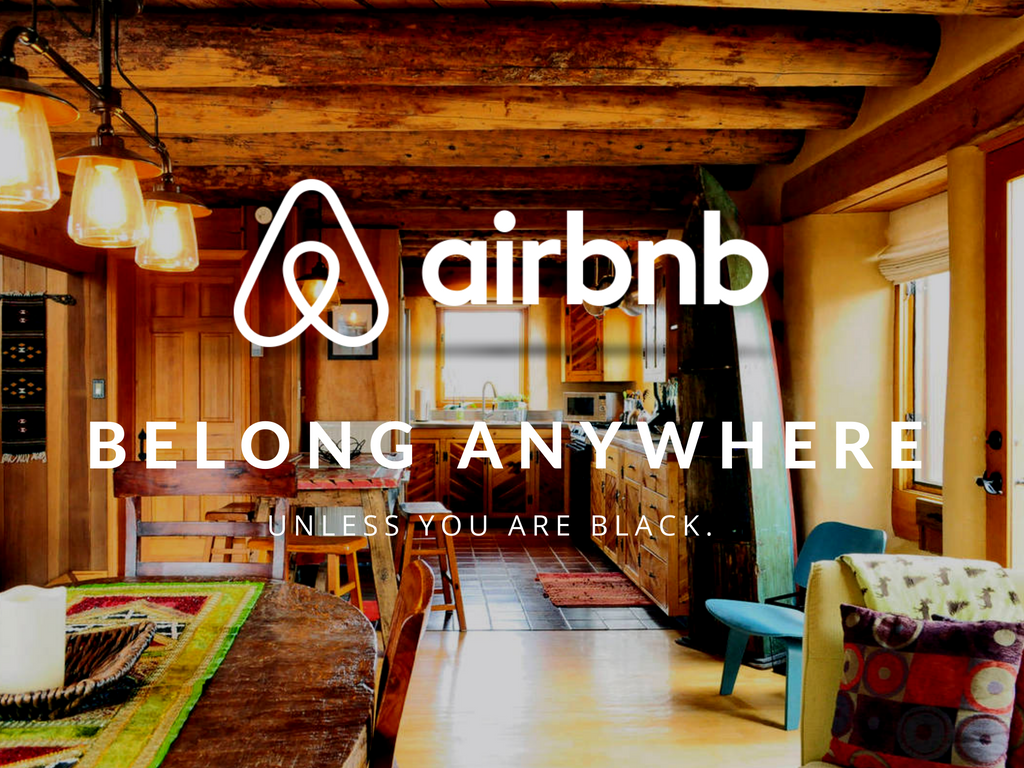

Airbnb, Inc.
is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. Based in San Francisco, California, the platform is accessible via website and mobile app. Airbnb does not own any of the listed properties; instead, it profits by receiving commission from each booking. The company was founded in 2008 by Brian Chesky, Nathan Blecharczyk, and Joe Gebbia. Airbnb is a shortened version of its original name, AirBedandBreakfast.com. **bold text**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/My Drive/'

In [5]:
airbnb_df = pd.read_csv(path + 'Airbnb NYC 2019.csv')

In [6]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
####id: listing id
####name: listing name
####host_id: host id
####host_name: host name
####neighbourhood_group: NYC borough
####neighbourhood: NYC neighborhood
####latitude: listing latitude
####longitude: listing longitude
####room_type: type of listing (Entire home/apt, Private room, Shared room)
####price: listing price
####minimum_nights: required minimum nights stay
####number_of_reviews: total number of reviews
####last_review: date of last review
####reviews per month: average number of reviews per month
####calculated_host_listings_count: total number of listings for this host
####availability_365: number of days listing is available out of 365

In [8]:
pd.set_option('display.max_columns', None) 
airbnb_df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
airbnb_df.shape

(48895, 16)

In [10]:
airbnb_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
print('\n Number of Rows : ',airbnb_df.shape[0])
print('\n Number of Columns :', airbnb_df.shape[1])
print('\n Types of Columns:',airbnb_df.columns.to_list())
print('\n Requirement of Unique Identities: \n\n\n',airbnb_df.nunique())


 Number of Rows :  48895

 Number of Columns : 16

 Types of Columns: ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

 Requirement of Unique Identities: 


 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                  

### Further let's find out categoricals in columns and non categoricals.

####**What are categoricals in pandas?**

> **Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values (categories; levels in R). Examples are gender, social class, blood type, country affiliation, observation time or rating via Likert scales.**

## Categorical variables:


Neighbourhood, Neighbourhood group, room type, 

## Numerical variables:
latitude, longitude, price, minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365  

In [12]:
airbnb_df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

#Missing Values
last review can be removed as it's have no impact on the specific question of our analysis.

reviews per month - replacing the null values with 0

In [13]:
airbnb_df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
airbnb_df.drop(['last_review'], axis=1,inplace=True)

In [15]:
null_replacements = {"reviews_per_month":0}

airbnb_df = airbnb_df.fillna(null_replacements)

In [16]:
airbnb_df['host_name'].fillna("unavailable",inplace = True)
airbnb_df['name'].fillna("unavailable",inplace = True)

In [17]:
airbnb_df.isnull()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48891,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48892,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
48893,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [18]:
#airbnb_df.isnull().sum()

#Lets Start with the analysis and dig deep into the questions that are assigned to us

In [19]:
airbnb_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


In [20]:
airbnb = airbnb_df

In [21]:
airbnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [22]:
len(airbnb[airbnb['price']==0]) #so 11 listed properties have prices listed as 0

11

In [23]:
airbnb['price'].describe() #getting the overall summary statistics for price column

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


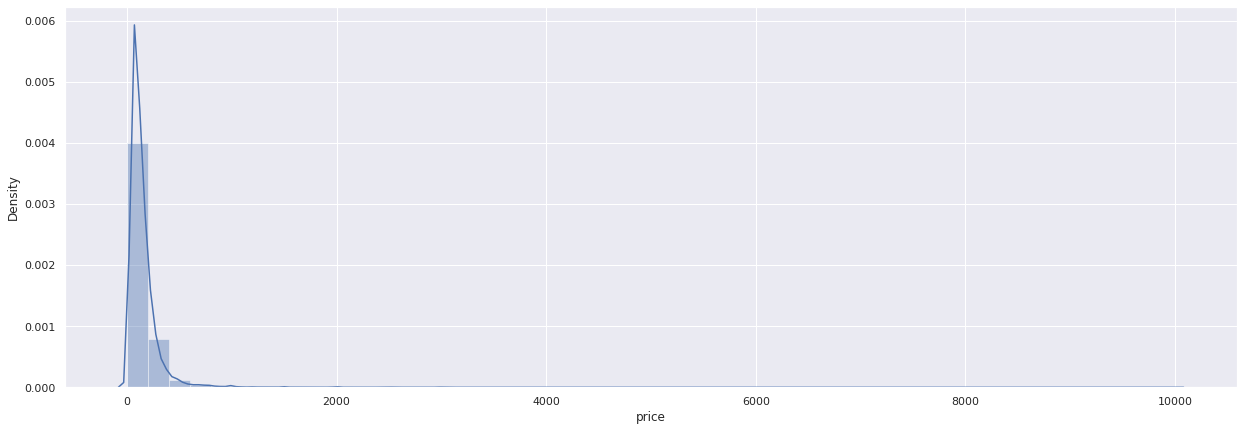

In [24]:
#distplot
# f,ax=plt.subplots(figsize=(8,6))
sns.set(rc={"figure.figsize": (21, 7)})
sns.distplot(airbnb['price'],hist=True)

'''The distribution tells it has positive skew
also the distribution doesn't deviate much from normal distribution.'''

In [25]:
#skewness and kurtosis
print("Skewness: %f" % airbnb['price'].skew())
print("Kurtosis: %f" % airbnb['price'].kurt())

Skewness: 19.118939
Kurtosis: 585.672879


'''Here the skew and kurtosis came out very large. Since the skewness has value>1 it is highly skewed.
Also kurtosis looks high as well which indicates presence of good amount of outliers,we will look later into that when we handle outliers!!'''

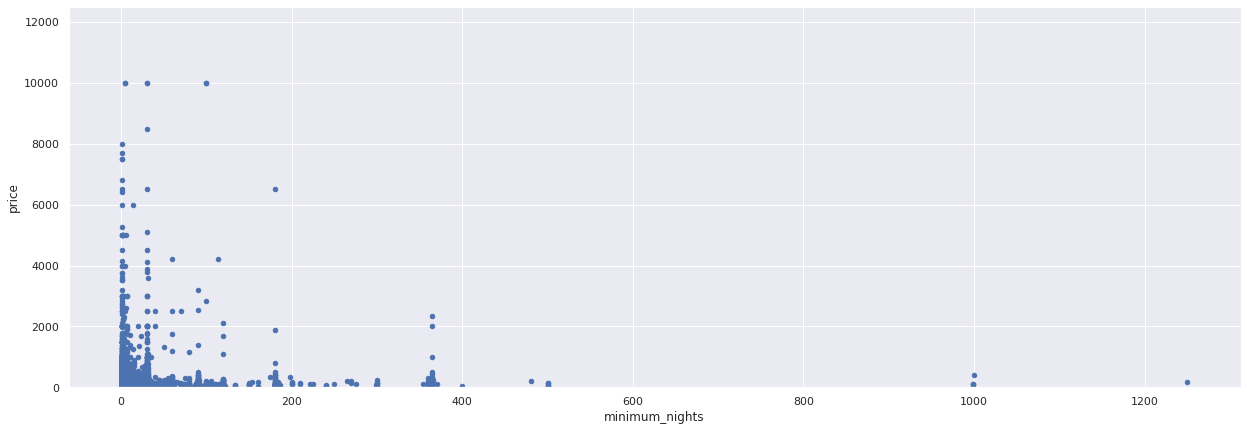

In [26]:
# price vs minimum_nights

var='minimum_nights'

data=pd.concat([airbnb['price'],airbnb[var]],axis=1)
data.plot.scatter(x=var,y='price',ylim=(0,12500))

'''here we can see that there are many data points clustered at 0 range of price. This shows that there is an anomaly in price column 
which ultimately means that there are many outliers present in the price column'''

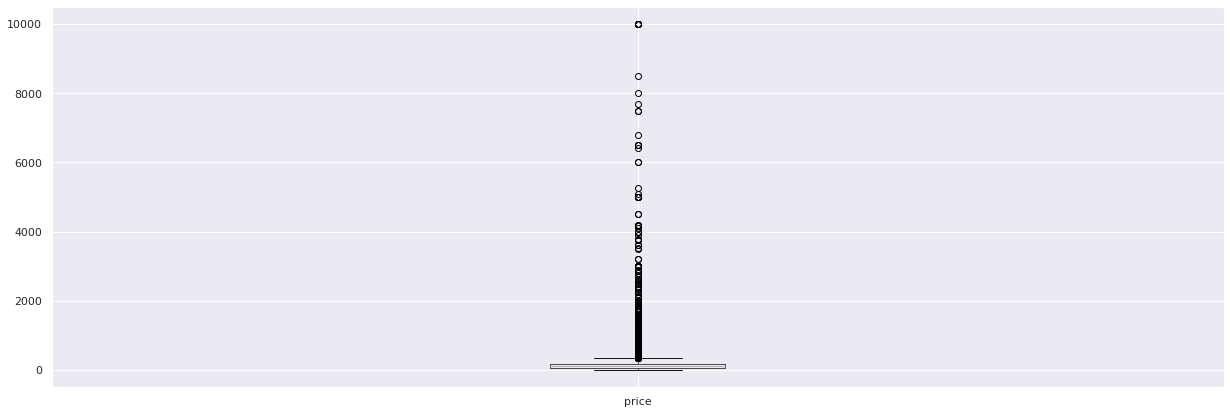

In [27]:
airbnb.boxplot(column=['price'])
plt.show()
#we can see the presence of many outliers in price from the boxplot. Definitely we'll remove those.

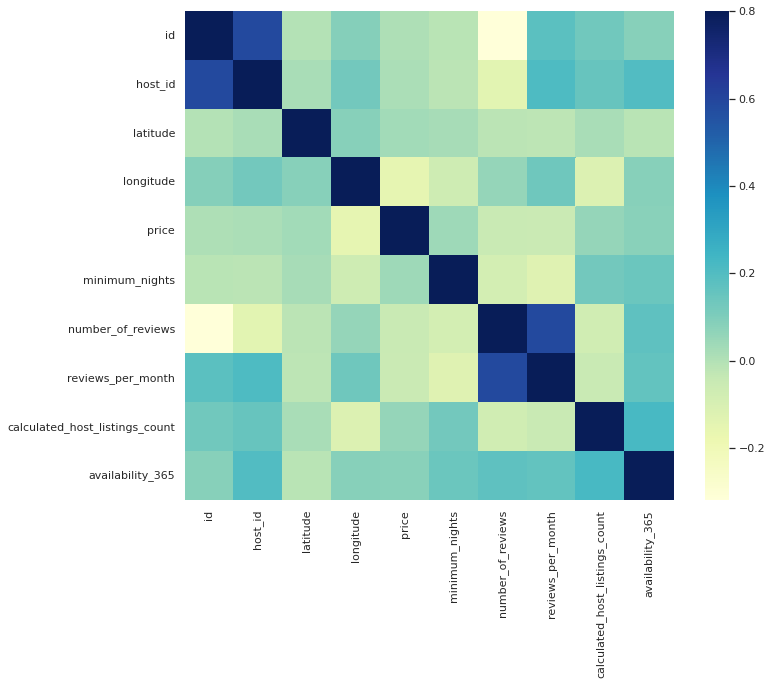

In [28]:
#correlation matrix
corrmat = airbnb.corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap = "YlGnBu");

In [29]:
corrmat

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.180221,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.209783,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.018758,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.138516,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.050564,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.124905,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.589407,-0.072376,0.172028
reviews_per_month,0.180221,0.209783,-0.018758,0.138516,-0.050564,-0.124905,0.589407,1.000000,-0.047312,0.163732
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.047312,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.163732,0.225701,1.000000


Clearly from the heatmap we can see the correlation between different features that can affect a airbnb listing.

There's correlation among host_id to reveiws_per_month & availability_365. Also there's noticiable correlation between min_nights to no_of_listings_count & availability_365. Price also shows some correlation with availability_365 & host_listings_count.

no_of_reviews and reviews_per_month gives almost the same information. so we can carry out analysis with any of the two variable. Also, no_of_reviews is correlated to availability_365!

Text(0.5, 1.0, 'Top neighbourhoods in entire NYC on the basis of count of listings')

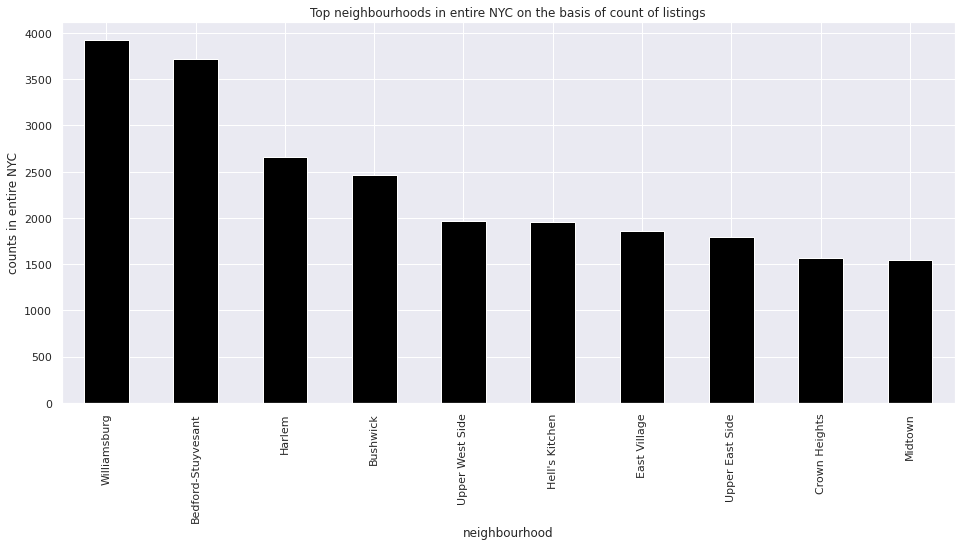

In [106]:
top_10_neighbours = airbnb['neighbourhood'].value_counts()[:10]
top_10_neighbours.plot(kind='bar',color='Black')
plt.xlabel('neighbourhood')
plt.ylabel('counts in entire NYC')
plt.title('Top neighbourhoods in entire NYC on the basis of count of listings')

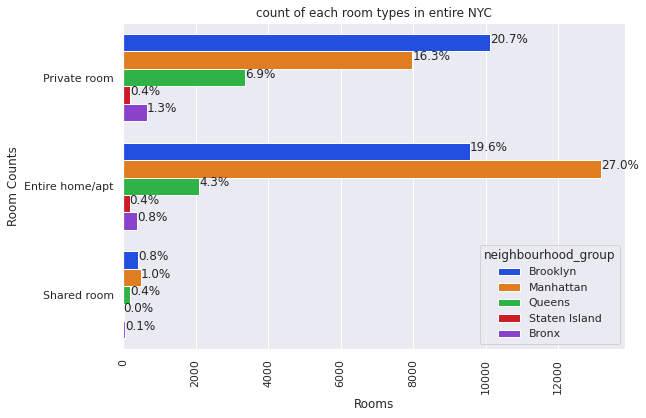

In [31]:
plt.rcParams['figure.figsize'] = (9, 6)
ax= sns.countplot(y='room_type',hue='neighbourhood_group',data=airbnb,palette='bright')

total = len(airbnb['room_type'])
for bar in ax.patches:
  percentage = '{:.1f}%'.format(100*bar.get_width()/total)
  x = bar.get_x() + bar.get_width() + 0.02
  y = bar.get_y() + bar.get_height()/2
  ax.annotate(percentage, (x,y))
              # ha = 'center', va = 'center',
              # xytext = (0, 9),
              # textcoords = 'offset points')

plt.title('count of each room types in entire NYC')
plt.xlabel('Rooms')
plt.xticks(rotation=90)
plt.ylabel('Room Counts')

plt.show()

Manhattan has more listed properties with Entire home/apt around 27% of total listed properties followed by Brooklyn with around 19.6%.

Private rooms are more in Brooklyn as in 20.7% of the total listed properties followed by Manhattan with 16.3% of them. While 6.9% of private rooms are from Queens.

Very few of the total listed have shared rooms listed on Airbnb where there's negligible or almost very rare shared rooms in Staten Island and Bronx.

We can infer that Brooklyn,Queens,Bronx has more private room types while Manhattan which has the highest no of listings in entire NYC has more Entire home/apt room types.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


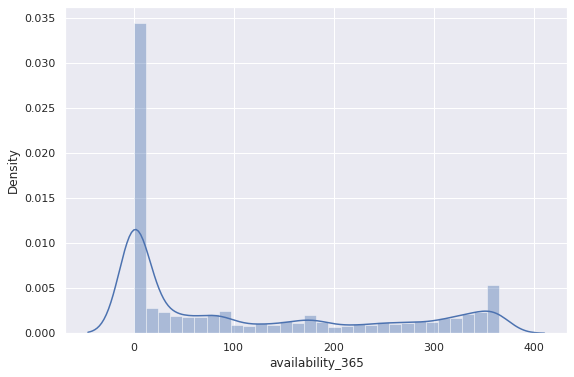

In [32]:
#distribution of listings availability at NYC!
sns.distplot(airbnb['availability_365'])

availability_365 have uniform distribution with availability ranging from 0 to 370

The distribution looks slighly skewed towards right or moderately skewed as per the skewness value ranging between: (0.5-0.1)

Also the distribution looks flatter as compared to a normal distribution, known to be platykurtosis with a negative kurtosis(lack of outliers) as below:

In [33]:
#skewness and kurtosis
print("Skewness: %f" % airbnb['availability_365'].skew())
print("Kurtosis: %f" % airbnb['availability_365'].kurt())

Skewness: 0.763408
Kurtosis: -0.997534


Reviews/month distribution as per listings in NYC

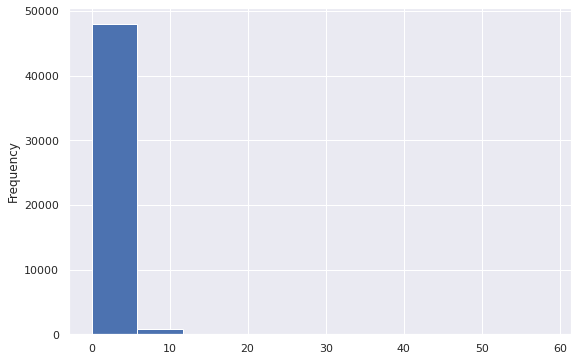

In [34]:
airbnb['reviews_per_month'].plot.hist()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


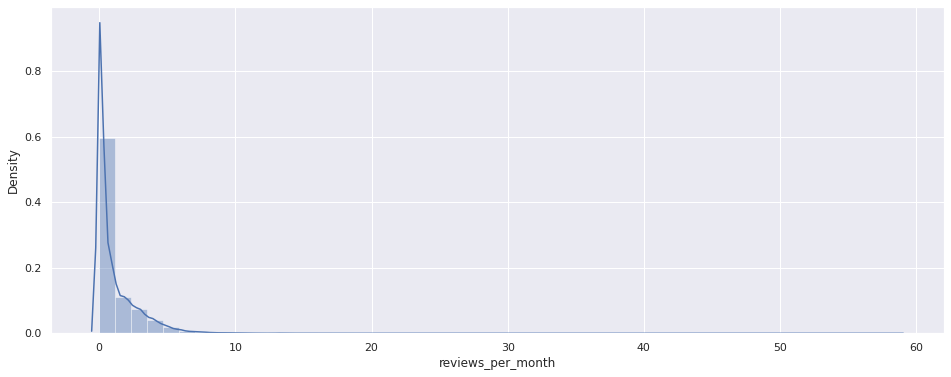

In [35]:
fig, ax = plt.subplots(figsize=(16,6))
sns.distplot(airbnb['reviews_per_month'])

Looks the reviews_per_month is positively skewed(high) towards right with longer tails indicating the presence of outliers.

Moreover, from the two distribution we can infer that monthly reviews goes from 0-10 and it ranges till 60 at highest.

In [36]:
#skewness and kurtosis
print("Skewness: %f" % airbnb['reviews_per_month'].skew())
print("Kurtosis: %f" % airbnb['reviews_per_month'].kurt())
#both skewness and kurtosis are much high, indicates presence of large amount of outliers.

Skewness: 3.300723
Kurtosis: 43.531611


###**Handling the outliers! *GASP!* Finally the headache is here.**

Remember that infamous price column?

Yeah we'll look into it now!

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


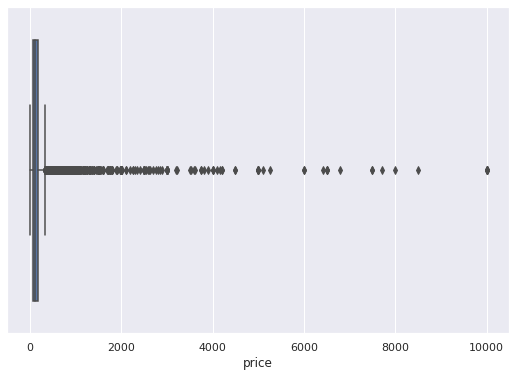

In [37]:
sns.boxplot(airbnb['price'])

In [38]:
airbnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


####Trying and Experimenting with the Quantile approach for Outlier detection and removal:

In [39]:
min_threshold,max_threshold= airbnb.price.quantile([0.01,0.9999])
min_threshold,max_threshold

(30.0, 9999.0)

In [40]:
# from numpy import percentile
# a,b = percentile(airbnb['price'],25), percentile(airbnb['price'],75)
# a,b

In [41]:
# min_threshold,max_threshold= airbnb.price.quantile([0.25,0.75])
# min_threshold,max_threshold

In [42]:
airbnb[airbnb.price<min_threshold] #prices less than min threshold!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
957,375249,Enjoy Staten Island Hospitality,1887999,Rimma & Jim,Staten Island,Graniteville,40.62109,-74.16534,Private room,20,3,80,0.92,1,226
2675,1428154,"Central, Peaceful Semi-Private Room",5912572,Tangier,Brooklyn,Flatbush,40.63899,-73.95177,Shared room,29,2,5,0.07,1,321
2860,1620248,Large furnished 2 bedrooms- - 30 days Minimum,2196224,Sally,Manhattan,East Village,40.73051,-73.98140,Entire home/apt,10,30,0,0.00,4,137
3020,1767037,Small Cozy Room Wifi & AC near JFK,9284163,Antonio,Queens,Woodhaven,40.68968,-73.85219,Private room,29,2,386,5.53,3,50
3918,2431607,"Bright, Airy Room Share for 2",4973668,Gloria,Brooklyn,Bedford-Stuyvesant,40.68642,-73.93440,Shared room,25,5,76,1.22,3,258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48486,36280646,"Cable and wfi, L/G included.",272872092,Chris,Queens,Forest Hills,40.73657,-73.85088,Entire home/apt,16,9,1,1.00,1,322
48647,36354776,Cozy bedroom in diverse neighborhood near JFK,273393150,Liza,Queens,Richmond Hill,40.68639,-73.81847,Private room,28,2,0,0.00,1,24
48832,36450814,FLATBUSH HANG OUT AND GO,267223765,Jarmel,Brooklyn,Flatbush,40.64922,-73.96078,Shared room,20,1,0,0.00,3,363
48867,36473044,The place you were dreaming for.(only for guys),261338177,Diana,Brooklyn,Gravesend,40.59080,-73.97116,Shared room,25,1,0,0.00,6,338


In [43]:
airbnb[airbnb.price>max_threshold] #prices more than max threshold!

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04,1,0
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,0.00,1,83


In [44]:
airbnb_new = airbnb[(airbnb.price>min_threshold)&(airbnb.price<max_threshold)]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


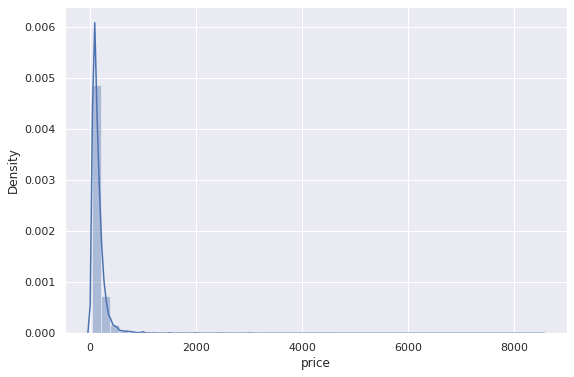

In [45]:
sns.distplot(airbnb_new['price'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


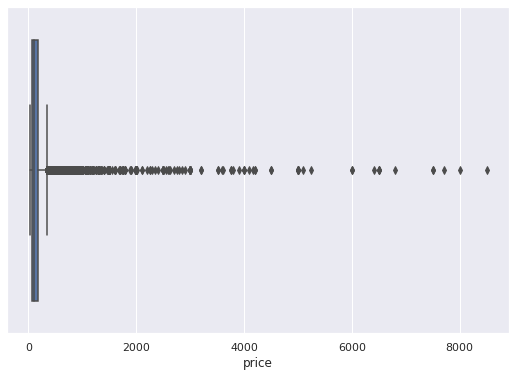

In [46]:
sns.boxplot(airbnb_new['price']) #still many outliers are present

In [47]:
#skewness and kurtosis
print("Skewness: %f" % airbnb_new['price'].skew())
print("Kurtosis: %f" % airbnb_new['price'].kurt())

Skewness: 15.075189
Kurtosis: 379.090156


*   Here some of the outliers were removed using the quantile approach but not all of them and still many are left according to the Skewness and Kurtosis values and box plot that was plotted. 
*   This was an experimental trial. Now we will use the IQR approach which has proven best for removing outliers.

####Removing Outliers using IQR approach!

(has performed best in removing outliers)

In [48]:
Q1 = airbnb.quantile(0.26)
Q3 = airbnb.quantile(0.76)
IQR = Q3 - Q1
print(IQR)

id                                1.979622e+07
host_id                           1.044825e+08
latitude                          7.288000e-02
longitude                         4.771000e-02
price                             1.100000e+02
minimum_nights                    4.000000e+00
number_of_reviews                 2.400000e+01
reviews_per_month                 1.630000e+00
calculated_host_listings_count    1.000000e+00
availability_365                  2.380000e+02
dtype: float64


In [49]:
#defining an outlier function to detect and remove outliers

def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [26,76]) #Q1 = First Quartile (25%) Q3 = Third Quartile (75%)
 IQR = Q3 - Q1 #formula for interquartile range
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 
 return lower_range,upper_range

In [50]:
#Q1,Q3 = np.percentile(airbnb.price , [26,76])
#Q1,Q3

Here 69 and 175 are the Quartile 1 and Quartile 3 values respectively.

In [51]:
#IQR = Q3 - Q1 
#lower_range = Q1 - (1.5 * IQR)
#upper_range = Q3 + (1.5 * IQR)
#lower_range,upper_range

Here -90 and 334 are the lower Ranges and Upper ranges of the outliers respectively.

In [52]:
lower_bound,upper_bound = outlier_treatment(airbnb['price'])

In [53]:
airbnb[(airbnb.price < lower_bound) | (airbnb.price > upper_bound)] #looking at the low and upper range outliers

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
61,15396,Sunny & Spacious Chelsea Apartment,60278,Petra,Manhattan,Chelsea,40.74623,-73.99530,Entire home/apt,375,180,5,0.12,1,180
85,19601,perfect for a family or small group,74303,Maggie,Brooklyn,Brooklyn Heights,40.69723,-73.99268,Entire home/apt,800,1,25,0.24,1,7
103,23686,2000 SF 3br 2bath West Village private townhouse,93790,Ann,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4,46,0.55,2,243
114,26933,2 BR / 2 Bath Duplex Apt with patio! East Village,72062,Bruce,Manhattan,East Village,40.72540,-73.98157,Entire home/apt,350,2,7,0.06,4,298
121,27659,3 Story Town House in Park Slope,119588,Vero,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2,16,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48757,36419574,Luxury & Spacious 1500 ft² MANHATTAN Townhouse,11454384,Ellen,Manhattan,Tribeca,40.71815,-74.01145,Entire home/apt,700,3,0,0.00,1,37
48758,36420289,"Rustic Garden House Apt, 2 stops from Manhattan",73211393,LaGabrell,Queens,Long Island City,40.75508,-73.93258,Entire home/apt,350,2,0,0.00,1,364
48833,36450896,Brand New 3-Bed Apt in the Best Location of FiDi,29741813,Yue,Manhattan,Financial District,40.70605,-74.01042,Entire home/apt,475,2,0,0.00,1,64
48839,36452721,Massage Spa. Stay overnight. Authors Artist dr...,274079964,Richard,Brooklyn,Sheepshead Bay,40.59866,-73.95661,Private room,800,1,0,0.00,1,23


In [54]:
airbnb_new1 = airbnb[(airbnb.price>lower_bound)&(airbnb.price<upper_bound)]

In [55]:
airbnb_new1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


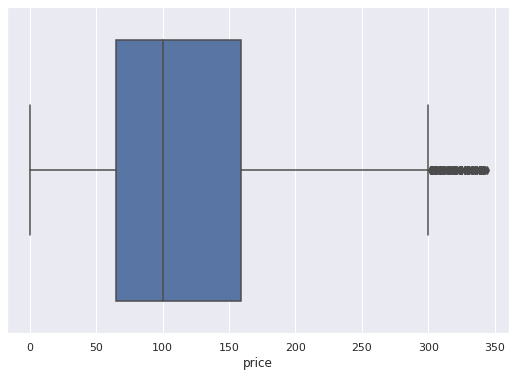

In [56]:
sns.boxplot(airbnb_new1.price)

In [57]:
#skewness and kurtosis
print("Skewness: %f" % airbnb_new1['price'].skew())
print("Kurtosis: %f" % airbnb_new1['price'].kurt())

Skewness: 0.935374
Kurtosis: 0.210598


After the IQR approach now the box plot looks great and there are no outliers present in it! **EUREKA...!**

Also the skewness and kurtosis have a stable and acceptable values.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


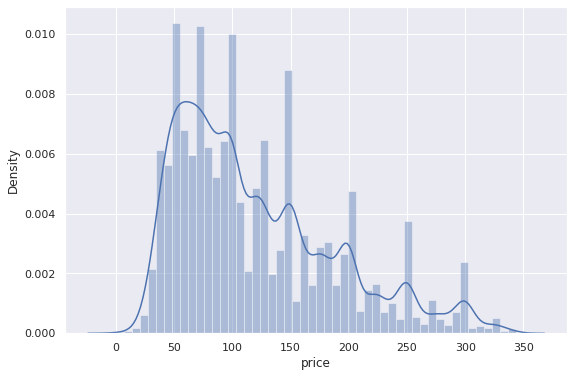

In [58]:
sns.distplot(airbnb_new1.price)

The distribution of price column now looks great and not one sided skewed!

#**Q1. What can we learn about different hosts and areas?**

In [59]:
#Let's first check the number of AirBnb listed neighbourhoods
airbnb_count = airbnb_new1.groupby(['neighbourhood_group'])['id'].count().reset_index().rename(columns = {'id': 'number_of_count'}).sort_values(by='number_of_count',ascending=False)

In [60]:
airbnb_count.head(5)

,neighbourhood_group,number_of_count
2,Manhattan,19554
1,Brooklyn,19421
3,Queens,5569
0,Bronx,1070
4,Staten Island,365


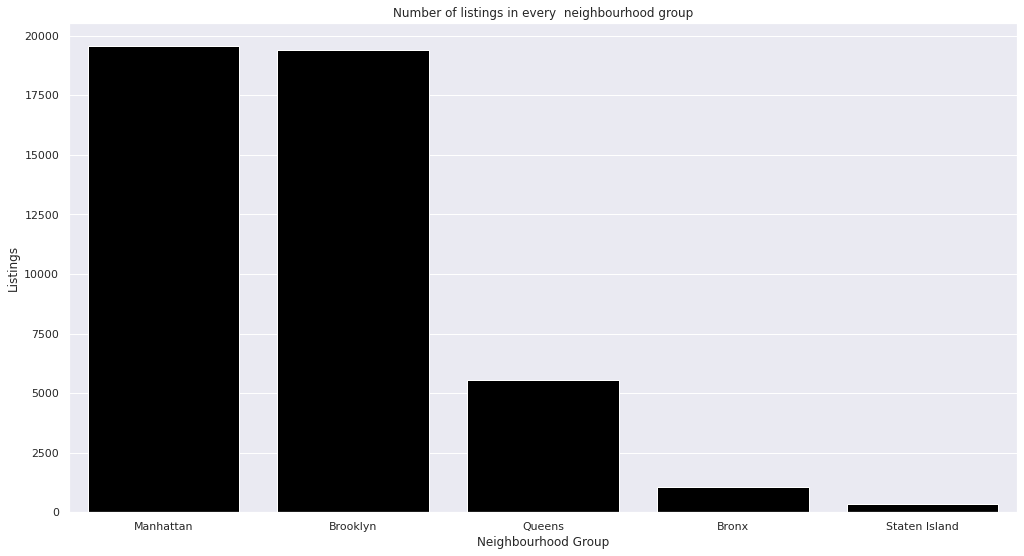

In [107]:
#Visualizing the count in graphical view
plt.rcParams['figure.figsize'] = (17,9)
gp = sns.barplot(x = airbnb_count['neighbourhood_group'], y = airbnb_count['number_of_count'], color = "black")
gp.set_xlabel('Neighbourhood Group')
gp.set_ylabel('Listings')
gp.set_title('Number of listings in every  neighbourhood group')
plt.show()

###**Inference Gained**: We can clearly spot that max number of listing come from **Manhattan**

####Further gaining the deeper insight of the particular host name with max calculated host listing count

In [62]:
#Using Groupby function grouping the data to get some clear insights via categories
hosts_ = airbnb_new1.groupby(['host_name','neighbourhood_group','room_type'])['calculated_host_listings_count'].max()
hosts_ = hosts_.reset_index()
#Sorting the values for more clear view...
hosts_.sort_values(by='calculated_host_listings_count',ascending=False) 

,host_name,neighbourhood_group,room_type,calculated_host_listings_count
15950,Sonder (NYC),Manhattan,Entire home/apt,327
15951,Sonder (NYC),Manhattan,Private room,327
2206,Blueground,Brooklyn,Entire home/apt,232
2207,Blueground,Manhattan,Entire home/apt,232
8876,Kara,Manhattan,Entire home/apt,121
...,...,...,...,...
7090,Ineza,Brooklyn,Private room,1
7091,Ing,Manhattan,Private room,1
7092,Inga,Manhattan,Entire home/apt,1
7093,Inga,Queens,Entire home/apt,1


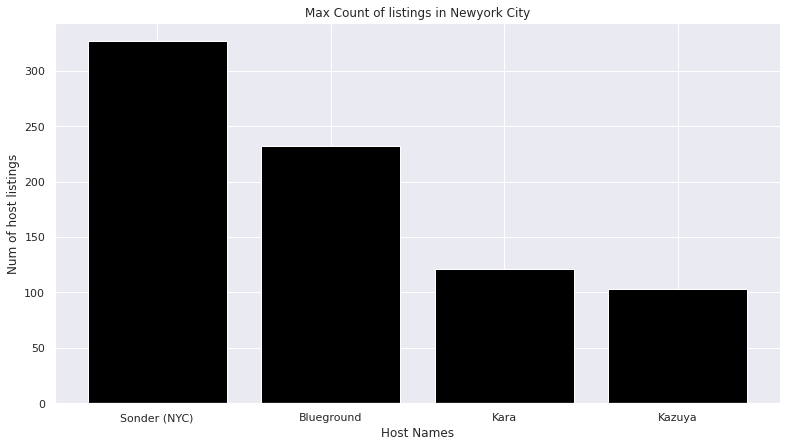

In [108]:
top_host = hosts_.sort_values(by='calculated_host_listings_count',ascending=False).head(8)

plt.rcParams['figure.figsize'] = (13,7)
host_name = top_host['host_name']
listing = top_host['calculated_host_listings_count']
plt.bar(host_name, listing, color="black")
plt.title('Max Count of listings in Newyork City')
plt.xlabel('Host Names')
plt.ylabel('Num of host listings')
plt.show()

###**Inference Gained** : **Sonder(NYC) of Manhattan** has the most number of calculated host listings

#**Q2. What can we learn from predictions? (ex: locations, prices, reviews, etc)**

##**Experimenting the Bi-variate Analysis of price column using Violin Plot and Point Plot**


Now doing analysis on the newly obtained price column without the extreme values along neighbourhood groups

In [64]:
#airbnb_new1['neighbourhood_group'].value_counts()

**Distribution of price across Manhattan,Brooklyn,Queens,Bronx & Staten Island :-**

Instead of checking distributions for each categories one by one we can simply do a violin plot for getting the overall statistics for each groups. But we'll get to know the median of price/neighbourhood group.

**Violin Plot:**

*   Violin Plot is a method to visualize the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis.
*   Violin Plots hold more information than the box plots, they are less popular. Because of their unpopularity, their meaning can be harder to grasp for many readers not familiar with the violin plot representation.

[Source: GeeksforGeeks](https://www.geeksforgeeks.org/violin-plot-for-data-analysis/)







In [65]:
#ax= sns.violinplot(x='neighbourhood_group',y='price',data=airbnb_new1)

As usual Manhattan being the most costliest place to live in, have price more than 140 USD followed by Brooklyn with around 80 USD on an average for the listings.

Queens, Staten Island are on the same page with price on listings.

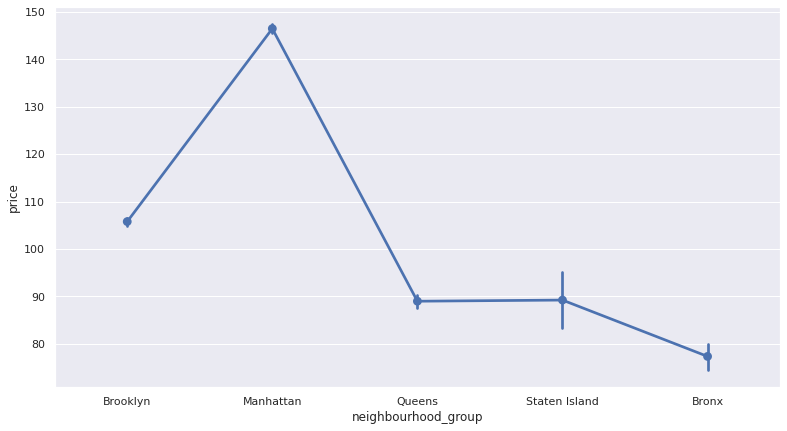

In [110]:
#trying to look for the average price each neighbourhood groups holds in a seaborn pointplot
sns.pointplot(x = 'neighbourhood_group', y='price', data=airbnb_new1, estimator=np.mean)

We can see that Manhattan has the highest(the costliest) average of price ranging to ~150USD/day followed by Brooklyn

Queens and Staten Island have same average price/day, while Bronx comes out to be the cheapest neighbourhood group in NYC.

In [67]:
##**Well, let's analyse more into cost of living as it is the key factor for someone willing to rent/stay using Airbnb.**

###Now, Let's check the expensive & cheapest listings with respect to prices leading in entire NYC!

The expensive ones go first!

In [68]:
airbnb_new1.sort_values(by='price', ascending=False)[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']][:5]

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
31806,"Perfect for groups! 3BR, 2Bath feet from Subway!",Manhattan,Harlem,Raphael,Entire home/apt,344
38682,"Welcoming Chelsea 1BR w/ Roof deck, Gym + Door...",Manhattan,Chelsea,Blueground,Entire home/apt,343
48563,"Stunning Chelsea 1BR w/ Gym, W/D, Doorman, Sun...",Manhattan,Midtown,Blueground,Entire home/apt,343
42558,"Spacious Midtown 1BR, w/ Balcony, Fitness cent...",Manhattan,Theater District,Blueground,Entire home/apt,343
38777,"Bespoke Central Chelsea 1BR w/ Gym, Doorman by...",Manhattan,Chelsea,Blueground,Entire home/apt,343


Looks like the top 5 expensive listings belong to Manhattan as Manhattan being NYC's cosliest place to live.

Now comes the cheapest ones!

In [69]:
airbnb_new1.sort_values(by='price', ascending=True)[['name','neighbourhood_group','neighbourhood','room_type']][:5]

,name,neighbourhood_group,neighbourhood,room_type
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,Private room
25795,Contemporary bedroom in brownstone with nice view,Brooklyn,Bedford-Stuyvesant,Private room
25794,Spacious comfortable master bedroom with nice ...,Brooklyn,Bedford-Stuyvesant,Private room
26866,Best Coliving space ever! Shared room.,Brooklyn,Bushwick,Shared room
25778,Modern apartment in the heart of Williamsburg,Brooklyn,Williamsburg,Entire home/apt


So here we can say that the cheapest listings come from Brooklyn and Bronx which makes sense as the room type is Private rooms and shared rooms. 

###Top neighbourhood groups in NYC with respect to their average price per day of Airbnb listings

Let's analyse for neighbourhoods haveing highest average price/day in each groups of NYC

In [70]:
df_ngrp= airbnb_new1.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().reset_index()

In [71]:
top_neigh_each= df_ngrp.loc[df_ngrp.groupby('neighbourhood_group')['price'].idxmax()].sort_values(by='price',ascending=False)
top_neigh_each

,neighbourhood_group,neighbourhood,price
218,Staten Island,Willowbrook,249.000000
163,Queens,Neponsit,237.000000
121,Manhattan,Tribeca,213.666667
82,Brooklyn,Mill Basin,179.750000
44,Bronx,West Farms,122.000000


Among the top neighbourhoods in each neighbourhood groups, top 2 of them namely: **Willowbrook** & **Neponsit**, origins from **Staten Island** & **Queens**.

**Tribeca** from **Manhattan** and **Mill Basin** from **Brooklyn**. **West Farms** from **Bronx**.

Text(0, 0.5, 'price')

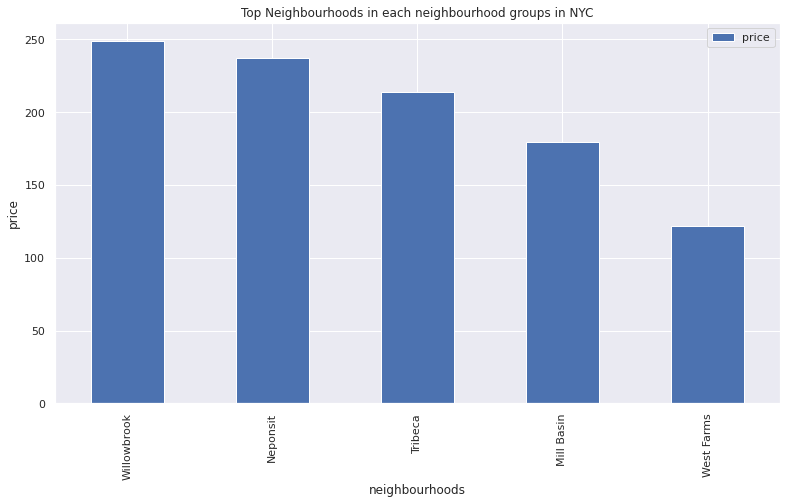

In [72]:
top_neigh_each.plot.bar(x='neighbourhood', title='Top Neighbourhoods in each neighbourhood groups in NYC')
plt.xlabel('neighbourhoods')
plt.ylabel('price')

###Let's checkout the costliest and cheapest listings in each neighbourhood groups & their respective hosts:

In [73]:
#costliest listings in each neighbourhood groups and their hosts
costliest = airbnb_new1.sort_values(by='price', ascending=False)[['name','neighbourhood_group','neighbourhood','host_name','room_type','price']][:5]

In [74]:
costliest

,name,neighbourhood_group,neighbourhood,host_name,room_type,price
31806,"Perfect for groups! 3BR, 2Bath feet from Subway!",Manhattan,Harlem,Raphael,Entire home/apt,344
38682,"Welcoming Chelsea 1BR w/ Roof deck, Gym + Door...",Manhattan,Chelsea,Blueground,Entire home/apt,343
48563,"Stunning Chelsea 1BR w/ Gym, W/D, Doorman, Sun...",Manhattan,Midtown,Blueground,Entire home/apt,343
42558,"Spacious Midtown 1BR, w/ Balcony, Fitness cent...",Manhattan,Theater District,Blueground,Entire home/apt,343
38777,"Bespoke Central Chelsea 1BR w/ Gym, Doorman by...",Manhattan,Chelsea,Blueground,Entire home/apt,343


Looks like the top 2 costliest listings are **Mid-Century Museum Sleepover** and **Parisian Palace in Heart of Manhattan** both from Manhattan as concluded earlier that Manhattan is the costliest and both these listings are hosted by **Adam** and **Aleszea** respectively.

In [75]:
cheapest = airbnb_new1.sort_values(by='price', ascending=True)[['name','neighbourhood_group','neighbourhood','host_name','room_type']][:5]

In [76]:
cheapest

,name,neighbourhood_group,neighbourhood,host_name,room_type
25433,★Hostel Style Room | Ideal Traveling Buddies★,Bronx,East Morrisania,Anisha,Private room
25795,Contemporary bedroom in brownstone with nice view,Brooklyn,Bedford-Stuyvesant,Adeyemi,Private room
25794,Spacious comfortable master bedroom with nice ...,Brooklyn,Bedford-Stuyvesant,Adeyemi,Private room
26866,Best Coliving space ever! Shared room.,Brooklyn,Bushwick,Sergii,Shared room
25778,Modern apartment in the heart of Williamsburg,Brooklyn,Williamsburg,Aymeric,Entire home/apt


Looks like the top 2 cheapest listings are Coliving in Brooklyn! Modern design / Shared room and ★Hostel Style Room | Ideal Traveling Buddies★ from Brooklyn and Bronx respectively  and both these listings are hosted by Sergil and Anisha respectively.

###Now lets analyse on the room types vs their prices on different neighbourhood groups

In [77]:
#airbnb_new1['room_type'].unique() #unique rooms available throughout NYC

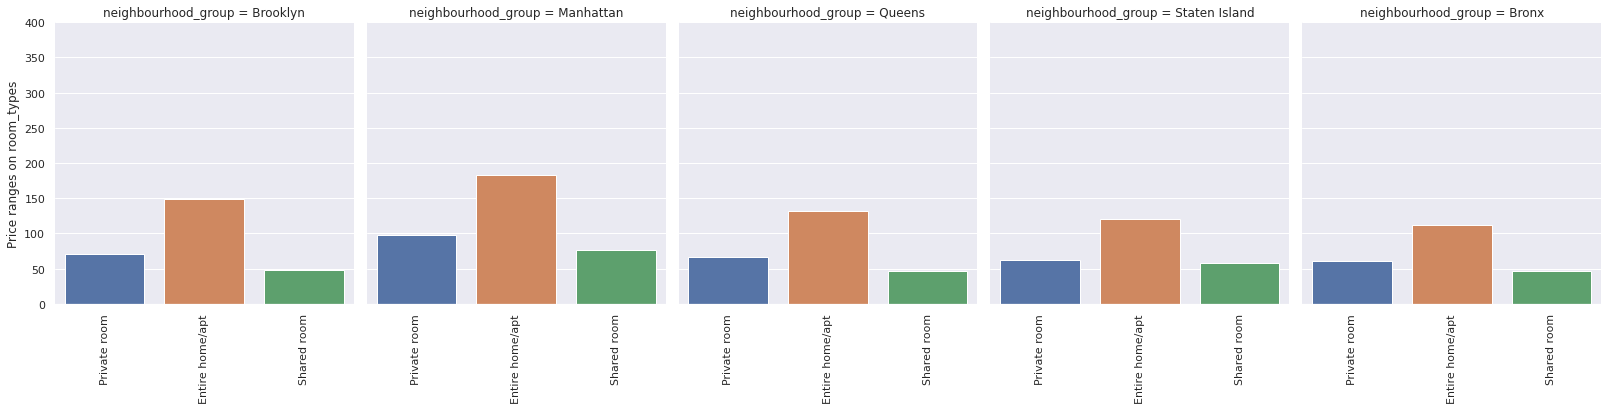

In [78]:
#room_type vs price
ax = sns.catplot(x="room_type", y="price", col="neighbourhood_group",
                data=airbnb_new1, saturation=.8,
                kind="bar",ci=None,  aspect=.9)
(ax.set_axis_labels("", "Price ranges on room_types")
  .set_xticklabels(["Private room", "Entire home/apt", "Shared room"],rotation=90)
  .set(ylim=(0, 400))
  .despine(left=True))


In [79]:
#min_night= airbnb_new1['room_type']
#min_night



Text(0, 0.5, 'Min Stays')

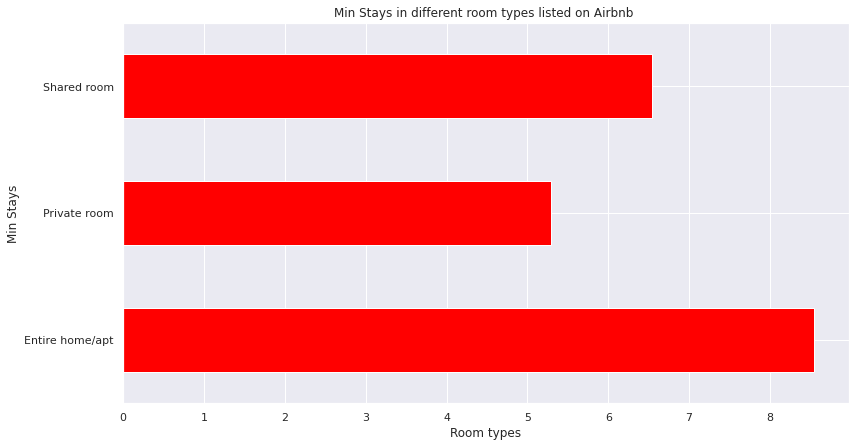

In [80]:
airbnb_new1.groupby('room_type')['minimum_nights'].mean().plot(kind='barh',color='red')
plt.title('Min Stays in different room types listed on Airbnb ')
plt.xlabel('Room types')
plt.ylabel('Min Stays')
# ax=sns.swarmplot(x="room_type", y="minimum_nights", data=airbnb_new1)

In [81]:
top10_reviewed_listings = airbnb_new1.sort_values(by='reviews_per_month',ascending=False)[['name','reviews_per_month','host_name','neighbourhood_group']][:10]

In [82]:
top10_reviewed_listings

,name,reviews_per_month,host_name,neighbourhood_group
42075,Enjoy great views of the City in our Deluxe Room!,58.50,Row NYC,Manhattan
42076,Great Room in the heart of Times Square!,27.95,Row NYC,Manhattan
38870,Lou's Palace-So much for so little,20.94,Louann,Queens
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,19.75,Nalicia,Queens
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,17.82,Nalicia,Queens
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,16.81,Nalicia,Queens
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,16.22,Danielle,Queens
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,16.03,Danielle,Queens
36238,“For Heaven Cakes”,15.78,Brent,Queens
40297,Studio Apartment 6 minutes from JFK Airport,15.32,Lakshmee,Queens


So, these are the listings with highest number of reviews, the highest being 58 reviews/month for Enjoy great views of the City in ur Delux Room! followed by Great Room in the heart of Times Square! both in Manhattan which shows that Manhattan is the best suited place to live with maximum number of reviews but the prices are high to afford.

Let's analyse and see how reviews vary with room type and what's their relation

Text(0.5, 1.0, 'Most no. of room types reviewed in each neighbourhood groups')

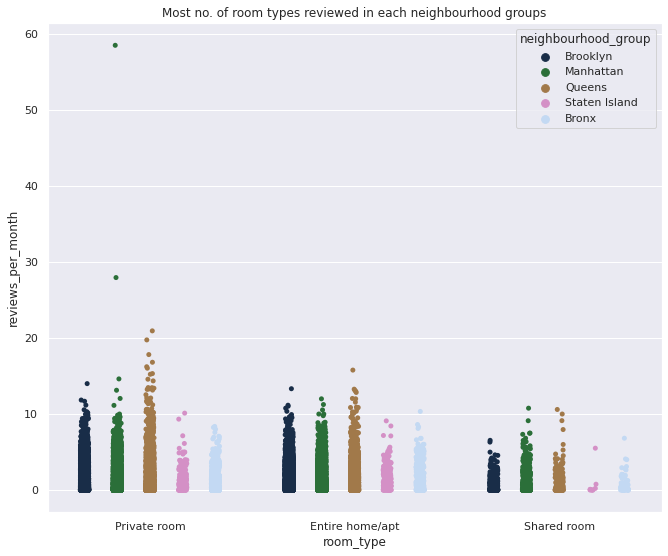

In [83]:
f,ax = plt.subplots(figsize=(11,9))
ax= sns.stripplot(x='room_type',y='reviews_per_month',hue='neighbourhood_group',dodge=True,data=airbnb_new1,palette="cubehelix")
ax.set_title('Most no. of room types reviewed in each neighbourhood groups')

**Here we can conclude that Private rooms in Manhattan Neighbourhood group had the highest number of reviews going 50+ reviews per month followed by the chase also by Manhattan in the same category of rooms. After Manhattan, Queens had the highest number of reviews in all the room types.**

**There were less reviews recieved from shared rooms as compared to other room types and it was from Staten Island followed by Bronx.**

Now let's check the top 10 hosts which reviewed the most listings **bold text**

In [84]:
reviews=top10_reviewed_listings.groupby('host_name')['reviews_per_month'].mean().reset_index().sort_values(by='reviews_per_month',ascending=False)
reviews

,host_name,reviews_per_month
5,Row NYC,43.225000
3,Louann,20.940000
4,Nalicia,18.126667
1,Danielle,16.125000
0,Brent,15.780000
2,Lakshmee,15.320000


Text(0.5, 1.0, 'Top 10 Reviews/month received by hosts')

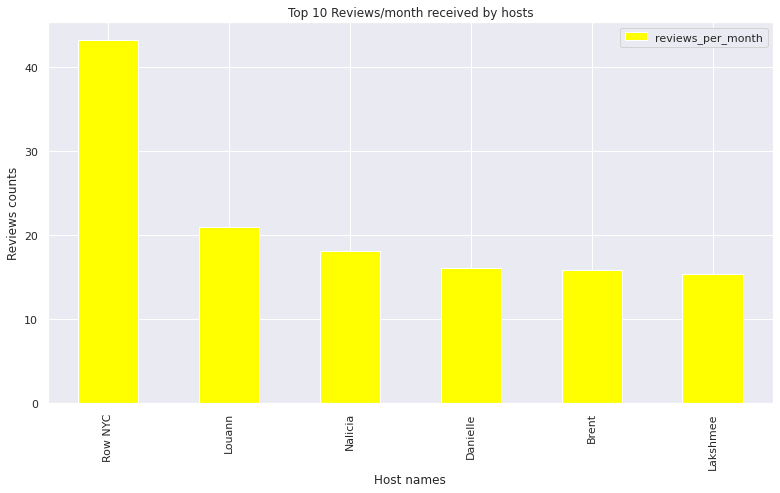

In [85]:
reviews.plot(x='host_name',y='reviews_per_month',kind='bar',color='yellow')
plt.ylabel('Reviews counts')
plt.xlabel('Host names')
plt.title('Top 10 Reviews/month received by hosts')

So, as we can conclude from the bar chart that Row NYC has the most number of reviews/month i.e. 40+ reviews/month

In [86]:
 #g,ax = plt.subplots(figsize=(15,8))
 #ax=sns.boxplot(x='neighbourhood_group',y='availability_365',data=airbnb_new1,palette="bright")
 #plt.title("Neighbourhood Group vs. Room Availabilty")
 #plt.xlabel('Neighbourhood groups')
 #plt.ylabel('Availability(365)')
 #plt.show()

Here with the categorical box plot we can see that room avalibility of Staten Island is available throughout the year to more than 300 days follwed by Bronx. On an average these listings are available to around 210 days in Staten Island and around 140 days in Bronx.

The rest are mostly available in the starting months of the year with Queens being available till the Summer ending and Monsoon starting.

Text(0.5, 1.0, 'Location Co-ordinates')

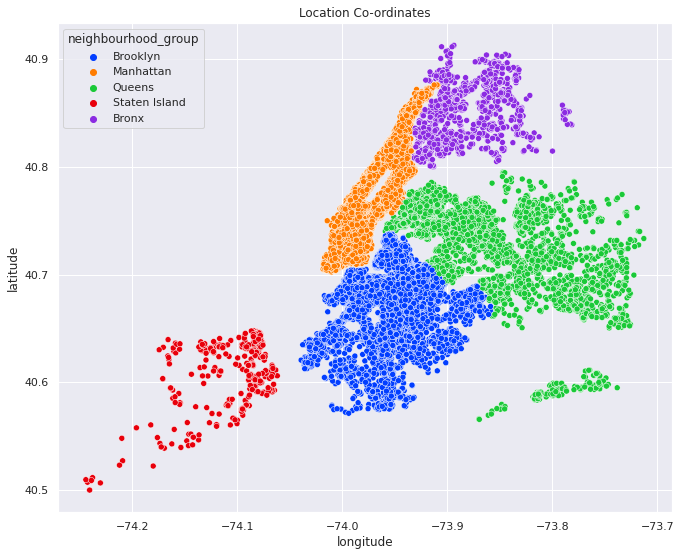

In [87]:
#trying to find where the coordinates belong from the latitude and longitude
sns.set(rc={"figure.figsize": (11, 9)})
ax= sns.scatterplot(data=airbnb_new1, x="longitude", y="latitude",hue='neighbourhood_group',palette='bright')
ax.set_title('Location Co-ordinates')

Text(0.5, 1.0, 'Distribution of type of rooms across NYC coordinates')

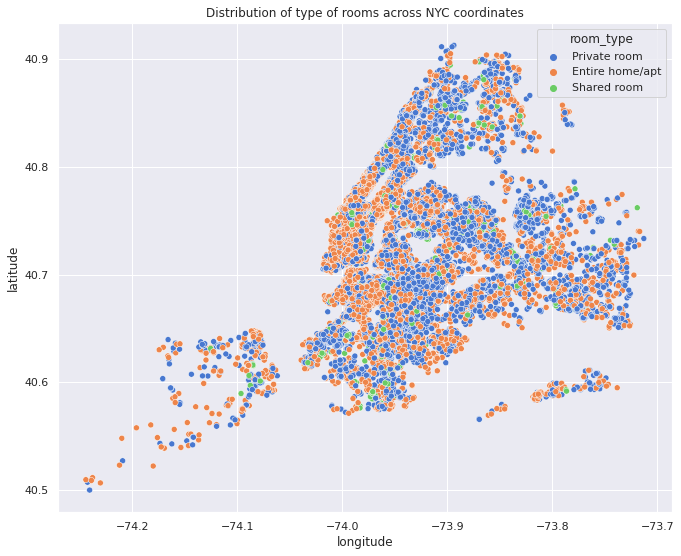

In [88]:
sns.set(rc={"figure.figsize": (11, 9)})
ax= sns.scatterplot(x=airbnb_new1.longitude, y=airbnb_new1.latitude,hue=airbnb_new1.room_type,palette='muted')
ax.set_title('Distribution of type of rooms across NYC coordinates')

By the two scatterplots of latitude vs longitude we can conclude that there's shared room listings throughout NYC are very less as compared to private and Entire home/apt.

95% of the listings on Airbnb are either Private room or Entire/home apt. Guests mostly have opted for Private room/Entire Apt as it's much easier for guests to stay in and rent on Airbnb.

Listing availibility of rooms in NYC througout the year can also be figured out using location coordinates

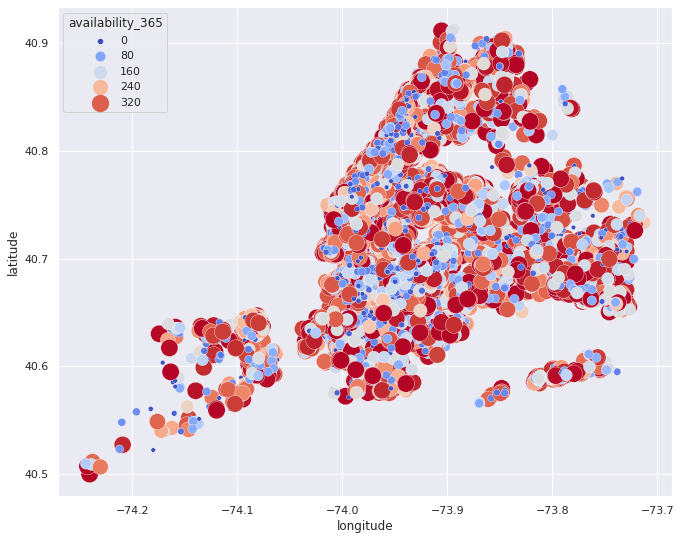

In [89]:
f, ax = plt.subplots(figsize=(11, 9))
ax=sns.scatterplot(data=airbnb_new1,x='longitude', y='latitude', hue="availability_365",palette='coolwarm',size='availability_365',sizes=(20,300))

As we discussed in previous analysis that Bronx and Staten Island listings are way cheaper than compared to others like Manhattan and Queen.

The reason behind this can be explained through this scatterplot map.

As you can see that Staten Island and Bronx listings are avaliable throughout the year, now this might be case that they are way cheaper than other neighbourhood groups.

Now Let's check the price variations across these coordinates and figure out where most prices were high according the coordinates

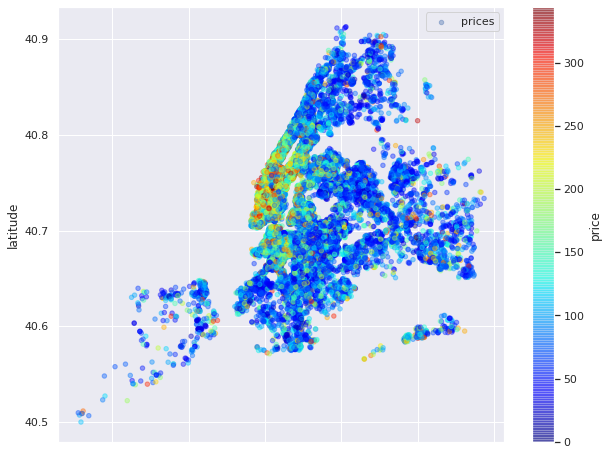

In [90]:
lat_long=airbnb_new1.plot(kind='scatter', x='longitude', y='latitude', label='prices', c='price',cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
lat_long.legend()

Here we can see that there high price ranges at Manhattan as it being the costliest place to live in NYC as we already analysed and derieved in our previous graphs and analysis.

Q3. Which hosts are the busiest and why?

In [91]:
busiest_hosts =airbnb_new1.groupby(['host_id','host_name','room_type'])['number_of_reviews'].max().reset_index().sort_values(by='number_of_reviews',ascending=False).head(10)

In [92]:
busiest_hosts

,host_id,host_name,room_type,number_of_reviews
23273,47621202,Dona,Private room,629
7317,4734398,Jj,Private room,607
21091,37312959,Maya,Private room,543
4368,2369681,Carol,Private room,540
18458,26432133,Danielle,Private room,510
12973,12949460,Asa,Entire home/apt,488
1886,792159,Wanda,Private room,480
4805,2680820,Linda,Private room,474
158,42273,Dani,Entire home/apt,467
17355,23591164,Angela,Private room,466


Now let's come to the Visulation Part

Text(0, 0.5, 'Number of Reviews')

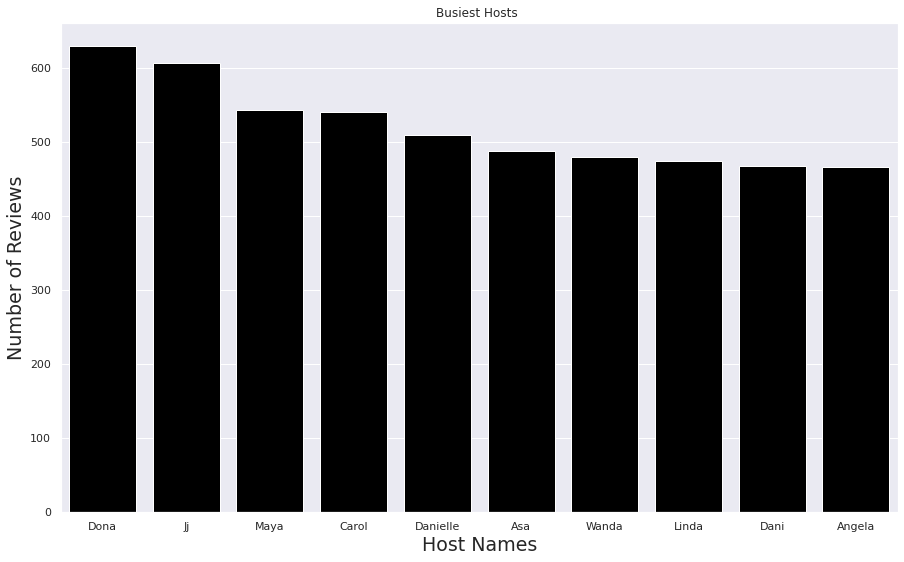

In [93]:
#analyzing the Visulation
fig,ax=plt.subplots(figsize=(15,9))
sns.barplot(data=busiest_hosts,x='host_name',y='number_of_reviews',ax=ax,capsize=.5, color='Black')
ax.set(title='Busiest Hosts ')
plt.xlabel('Host Names',{'fontsize':19})
plt.ylabel('Number of Reviews',{'fontsize':19})

Top 5 Busiest Hosts

i) Dona

ii) Ji

ii) Maya

iv) Carol

v) Danielle



Here we can conclude that, those types of room are listed by hosts are mostly highly reviwed, are the busiest host.

Q4. Is there any noticeable difference of traffic among different areas and what could be the reason for it?

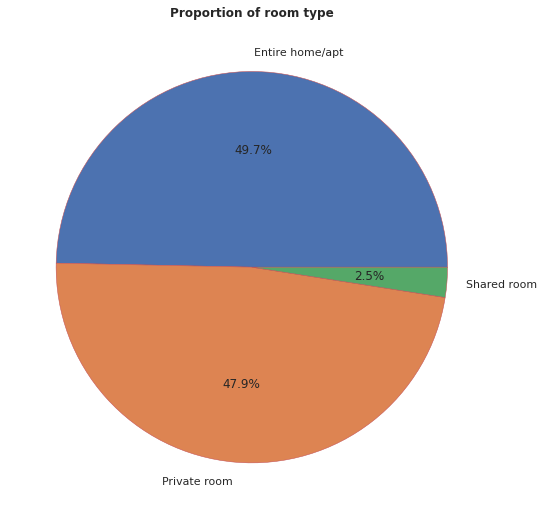

In [94]:
proportion = airbnb_new1['room_type'].value_counts()
labels = ['Entire home/apt','Private room', 'Shared room']
plt.title('Proportion of room type',weight = 'bold')
plt.pie(proportion,labels = labels, autopct = '%1.1f%%',wedgeprops = {"edgecolor" : "r",'linewidth': 0.5})
plt.show()

In [95]:
airbnb_new1['neighbourhood_group'].value_counts()

Manhattan        19554
Brooklyn         19421
Queens            5569
Bronx             1070
Staten Island      365
Name: neighbourhood_group, dtype: int64

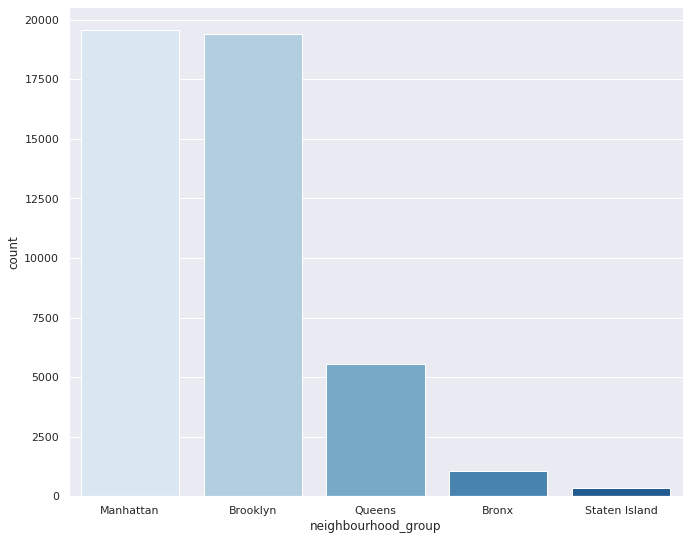

In [96]:
sns.countplot(x='neighbourhood_group', data=airbnb_new1,order=pd.value_counts(airbnb_new1['neighbourhood_group']).iloc[:].index,palette= 'Blues')

In [97]:
airbnb_new1['neighbourhood'].describe()

count            45979
unique             219
top       Williamsburg
freq              3732
Name: neighbourhood, dtype: object

Text(0, 0.5, 'Reservation Count')

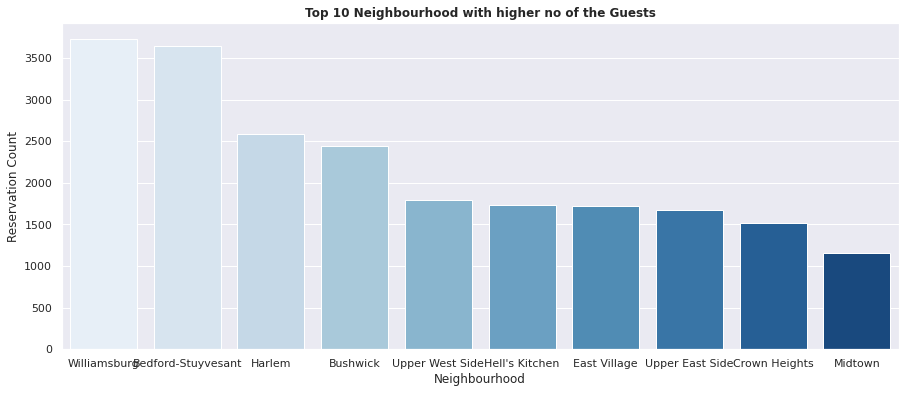

In [98]:
plt.rcParams["figure.figsize"] = (15,6)
sns.countplot(x='neighbourhood', data=airbnb_new1,order=pd.value_counts(airbnb_new1['neighbourhood']).iloc[:10].index,palette= 'Blues')
plt.title('Top 10 Neighbourhood with higher no of the Guests', weight='bold')
plt.xlabel('Neighbourhood')
plt.ylabel('Reservation Count')

In [99]:
airbnb_new1['minimum_nights'].describe()

count    45979.000000
mean         6.941495
std         19.850180
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

Analysing Neighbourhood traffic based on their price and recervation count

Text(0, 0.5, 'Price')

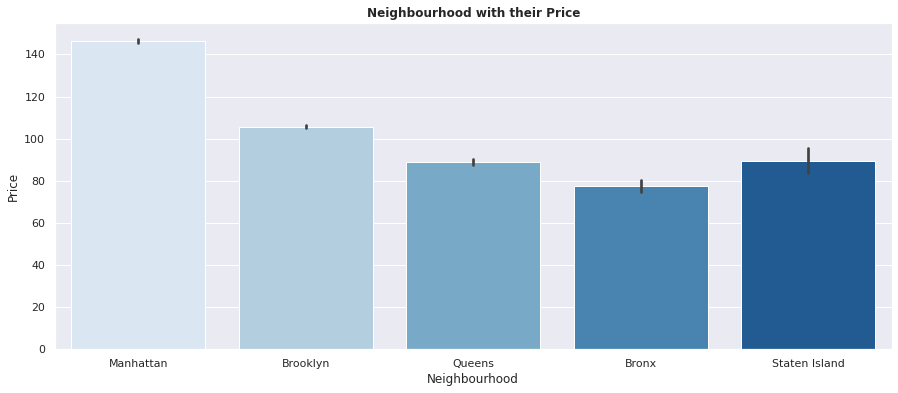

In [100]:
plt.rcParams["figure.figsize"] = (15,6)
plot = sns.barplot(x='neighbourhood_group',y='price', data=airbnb_new1,order=pd.value_counts(airbnb_new1['neighbourhood_group']).iloc[:].index,palette= 'Blues')

plt.title('Neighbourhood with their Price', weight='bold')
plt.xlabel('Neighbourhood')
plt.ylabel('Price')

Manhattan is the most expensive place compare to other with higher no of reservations. Following Brooklyn, Staten Island, Queens Neighbourhood, Bronx.
The unequaled Empire State Building, the Rockefeller Center, the surprising Chrysler Building, the fascinating Times Square, the controversial MoMA,etc the top attractions in NYC loacted in Manhattan. With only Times Square having over 39 million visitors annually.
This makes Manhattan as the most expensive and frequently booked neighbourhood in NYC.
Bronx is the most cheapest state
Analysing if there is a relation between the no of availability days and traffic among the respective areas

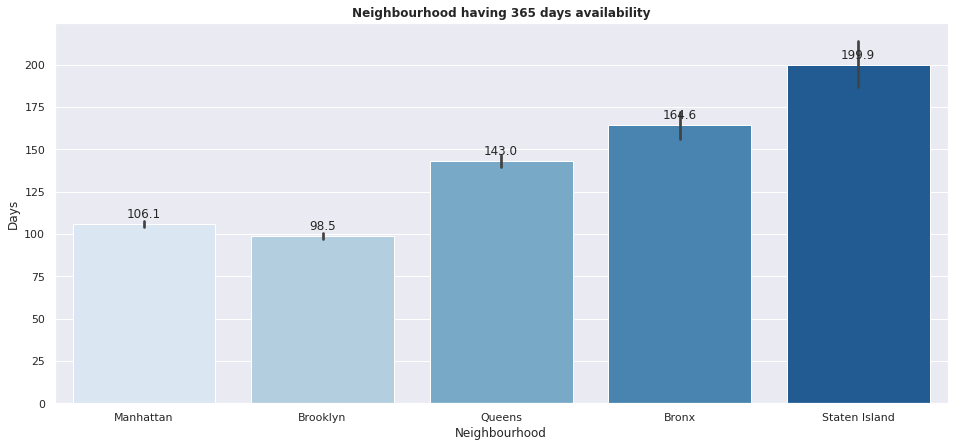

In [101]:
plt.rcParams["figure.figsize"] = (16,7)
plot = sns.barplot(x='neighbourhood_group',y='availability_365', data=airbnb_new1,order=pd.value_counts(airbnb_new1['neighbourhood_group']).iloc[:].index,palette= 'Blues')

plt.title('Neighbourhood having 365 days availability', weight='bold')
plt.xlabel('Neighbourhood')
plt.ylabel('Days')


for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

Hotels in Staten Islands are available for higher no of days then other neighbourhood groups. Brooklyn and Manhathan despite being the top 2 Highly expensive Neighbourhood groups seems to have lesser number of availability days.

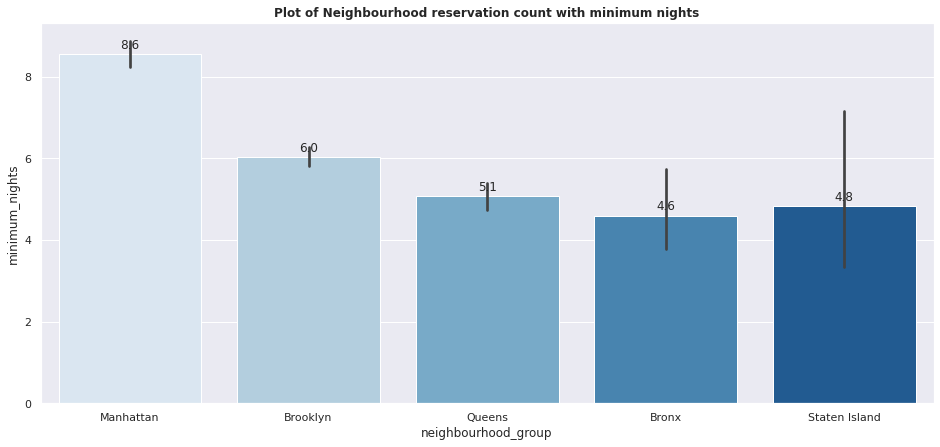

In [102]:
plt.rcParams["figure.figsize"] = (16,7)
plot = sns.barplot(x='neighbourhood_group',y='minimum_nights', data=airbnb_new1,order=pd.value_counts(airbnb_new1['neighbourhood_group']).iloc[:].index,palette= 'Blues')
plt.title('Plot of Neighbourhood reservation count with minimum nights', weight='bold')

for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


#### Guest are seemed to have a longer stay at Manhattan, Brooklyn and Queens compared to other neighbourhoods.

Text(0.5, 1.0, 'Neighbourhood with higher no of the Hosts')

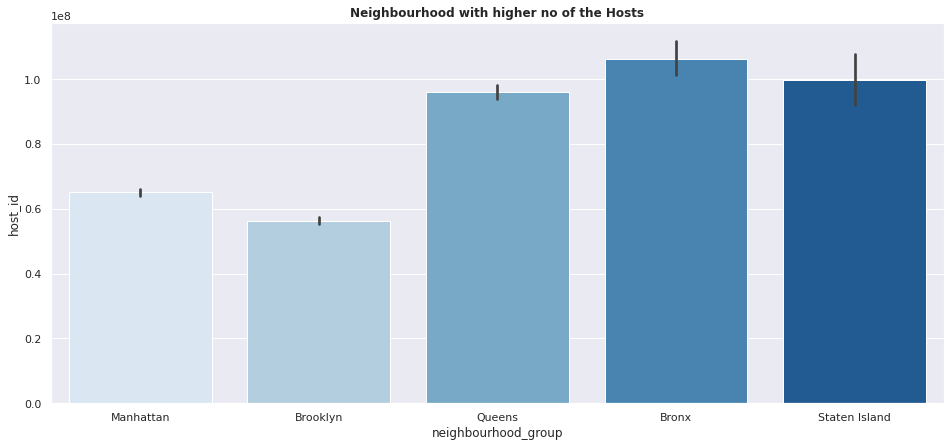

In [103]:
plt.rcParams["figure.figsize"] = (16,7)
plot = sns.barplot(x='neighbourhood_group',y='host_id', data=airbnb_new1,order=pd.value_counts(airbnb_new1['neighbourhood_group']).iloc[:].index,palette= 'Blues')
plt.title('Neighbourhood with higher no of the Hosts', weight='bold')

* Bronx has the higher no of hosts compare to other neighbourhoods but also the cheapest price rates.
* <b> (NOte: Not sure on this point is valid or not, pls rectify)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Plot of Neighbourhood with reservation count')

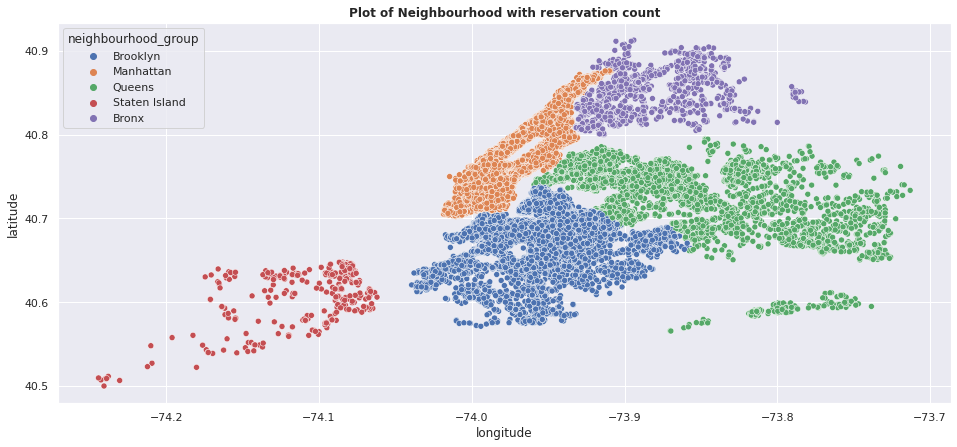

In [104]:
plt.rcParams["figure.figsize"] = (16,7)
sns.scatterplot(airbnb_new1.longitude,airbnb_new1.latitude,hue=airbnb_new1.neighbourhood_group)
plt.title('Plot of Neighbourhood with reservation count', weight='bold')

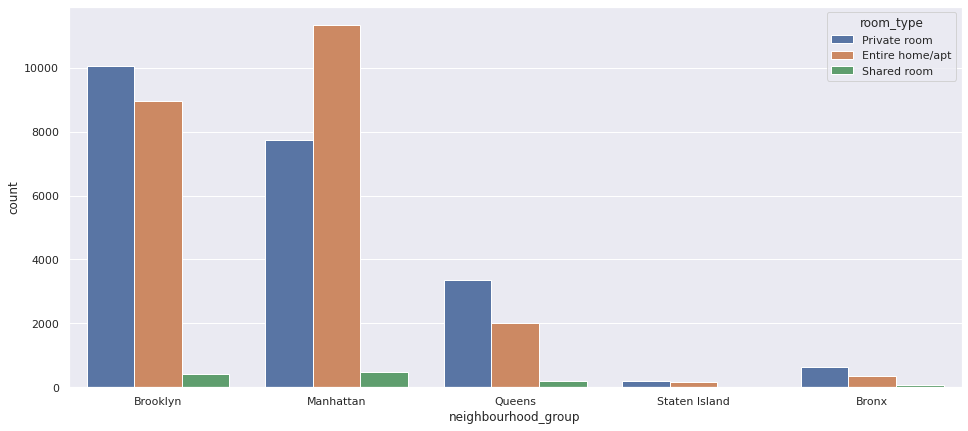

In [105]:
ax = sns.countplot(x='neighbourhood_group', hue='room_type', data=airbnb_new1)

#**Finally the conclusion. What do we know, what have we learnt, and what have we concluded** 

*   Well at first we can say that Manhattan is the costliest place to live and Brooklyn and Bronx being the cheapest to live.




*   People mostly prefer Entire Room/apartment room type for their stay and renting out and they spend more nights there compared to other room types.




*   Higher the number of reviews for a particular neighbourhood group, higher the people there which ultimately means that, that place is a tourist place



*   People have mostly chosen rooms with less prices which is obvious but in relative comparision not many people have booked places with expensive rates.



*   People staying not for more than one night in any neighbourhood group and room type that tells us something about those type of people that they are travellers and they are there for just a night stay.




*   The listings which were way cheaper than the other neighbourhood group listings were available for much more duration in terms of days than the listings who had higher prices, the higher pricing listings were only available for till the mid of the year.












***Here we end our analysis. ***

⭐⭐⭐⭐⭐⭐⭐⭐⭐⭐

**Thank you for reading it till here.** 



